# Klasifikasi Tingkat Pendapatan Berdasarkan Data Demografi dengan Metode K-Nearest Neighbor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [ ]:
df = pd.read_csv("../datasets/adult.csv")
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


## Exploration Data Analys

In [4]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Melihat deskripsi data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
df.describe(include="O").T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [7]:
# Melihat data yang unik
col_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income"]
for i in col_names:
    print(f"Kolom: {i}: {df[i].unique()}\n")

Kolom: workclass: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kolom: education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Kolom: marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Kolom: occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Kolom: relationship: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Kolom: race: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Kolom: gender: ['Male' 'Female']

Kolom: native-country: ['United-States' '?' 'Peru' 'Guate

In [8]:
# Mengecek data yang kosong
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [9]:
# ubah data yang "?"
cols = ["workclass", "occupation", "native-country"]
for i in cols:
    df[i] = df[i].replace("?", np.nan)

In [10]:
col_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income"]
for i in col_names:
    print(f"Kolom: {i}: {df[i].unique()}\n")

Kolom: workclass: ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kolom: education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Kolom: marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Kolom: occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Kolom: relationship: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Kolom: race: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Kolom: gender: ['Male' 'Female']

Kolom: native-country: ['United-States' nan 'Peru' 'Guate

In [11]:
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [12]:
# Menghapus data yang terdapat null
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


## Preprocessing

In [14]:
# Penyederhanaan fitur
col_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income"]

# Workclass
replace_workclass = {
    "Private": "Private",
    "Self-emp-not-inc": "Self-Employed",
    "Self-emp-inc": "Self-Employed",
    "Local-gov": "Government",
    "State-gov": "Government",
    "Federal-gov": "Government",
    "Without-pay": "Unemployed",
    "Never-workder": "Unemployed"
}
df['workclass'] = df['workclass'].replace(replace_workclass)
df['workclass'].head()

,workclass
0,Private
1,Private
2,Government
3,Private
5,Private


In [15]:
# Education
replace_education = {
    "Preschool": "Low",
    "1st-4th": "Low",
    "5th-6th": "Low",
    "7th-8th": "Low",
    "9th": "Low",
    "10th": "Low",
    "11th": "Low",
    "12th": "Low",
    "HS-grad": "Medium",
    "Some-college": "Medium",
    "Assoc-acdm": "Medium",
    "Assoc-voc": "Medium",
    "Bachelors": "High",
    "Masters": "High",
    "Doctorate": "High",
    "Prof-school": "High"
}

df['education'] = df['education'].replace(replace_education)
df['education'].head()

,education
0,Low
1,Medium
2,Medium
3,Medium
5,Low


In [16]:
# marital_status
replace_marital_status = {
    "Married-civ-spouse": "Married",
    "Married-AF-spouse": "Married",
    "Married-spouse-absent": "Maried",
    "Never-married": "Single",
    "Widowed": "Other",
    "Divorced": "Other",
    "Separated": "Other"
}
df['marital-status'] = df['marital-status'].replace(replace_marital_status)
df['marital-status'].head()

,marital-status
0,Single
1,Married
2,Married
3,Married
5,Single


In [17]:
# Relationship
replace_relationship = {
    "Husband": "Spouse",
    "Wife": "Spouse",
    "Own-child": "Child",
    "Other-relative": "Other",
    "Unmarried": "Single",
    "Not-in-family": "Single"
}

df['relationship'] = df['relationship'].map(replace_relationship)
df['relationship']

,relationship
0,Child
1,Spouse
2,Spouse
3,Spouse
5,Single
...,...
48837,Spouse
48838,Spouse
48839,Single
48840,Child


In [18]:
df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [19]:
# Ganti negara yang bukan United-States
df['native-country'] = np.where(
    df['native-country'] == 'United-States',
    "United-Stated",
    "Non-US"
)
df['native-country'].head()

,native-country
0,United-Stated
1,United-Stated
2,United-Stated
3,United-Stated
5,United-Stated


In [20]:
df['native-country'].unique()

array(['United-Stated', 'Non-US'], dtype=object)

In [21]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [22]:
df['income'] = np.where(
    df['income'] == "<=50K",
    "Low Income",
    "High Income"
)
df['income'].unique()

array(['Low Income', 'High Income'], dtype=object)

In [23]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Low,7,Single,Machine-op-inspct,Child,Black,Male,0,0,40,United-Stated,Low Income
1,38,Private,89814,Medium,9,Married,Farming-fishing,Spouse,White,Male,0,0,50,United-Stated,Low Income
2,28,Government,336951,Medium,12,Married,Protective-serv,Spouse,White,Male,0,0,40,United-Stated,High Income
3,44,Private,160323,Medium,10,Married,Machine-op-inspct,Spouse,Black,Male,7688,0,40,United-Stated,High Income
5,34,Private,198693,Low,6,Single,Other-service,Single,White,Male,0,0,30,United-Stated,Low Income


In [24]:
# ubah income agar menjadi numeric dengan label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['income'].head()

,income
0,1
1,1
2,0
3,0
5,1


In [25]:
col_names.pop(-1)

'income'

In [26]:
# ubah data kategori yang lain dengan OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded = encoder.fit_transform(df[col_names])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(col_names))
df_encoded.head(2)

,workclass_Private,workclass_Self-Employed,workclass_Unemployed,education_Low,education_Medium,marital-status_Married,marital-status_Other,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,...,occupation_Transport-moving,relationship_Other,relationship_Single,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_United-Stated
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [27]:
# Hapus fitur yang terkait agar tidak duplikat
df = df.drop(col_names, axis=1)
df.head(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,1


In [28]:
# Gabungkan dataframe
df = pd.concat([df, df_encoded], axis=1)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Private,workclass_Self-Employed,workclass_Unemployed,...,occupation_Transport-moving,relationship_Other,relationship_Single,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_United-Stated
0,25.0,226802.0,7.0,0.0,0.0,40.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
5,34.0,198693.0,6.0,0.0,0.0,30.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [29]:
income = df.pop("income")
df['income'] = income
df.head(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-Employed,workclass_Unemployed,education_Low,...,relationship_Other,relationship_Single,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_United-Stated,income
0,25.0,226802.0,7.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0
workclass_Private,45222.0,0.736522,0.440524,0.0,0.00,1.0,1.0,1.0
workclass_Self-Employed,45222.0,0.120340,0.325362,0.0,0.00,0.0,0.0,1.0
workclass_Unemployed,45222.0,0.000464,0.021545,0.0,0.00,0.0,0.0,1.0
education_Low,45222.0,0.125182,0.330929,0.0,0.00,0.0,0.0,1.0


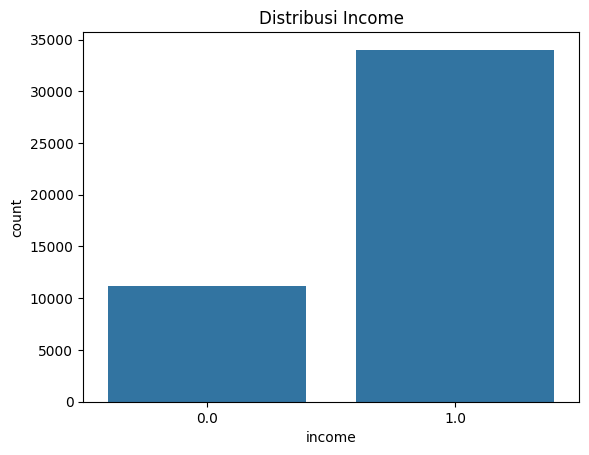

In [31]:
# Coba kita lihat distribusi data income apakah seimbang?
sns.countplot(x="income", data=df)
plt.title("Distribusi Income")
plt.show()

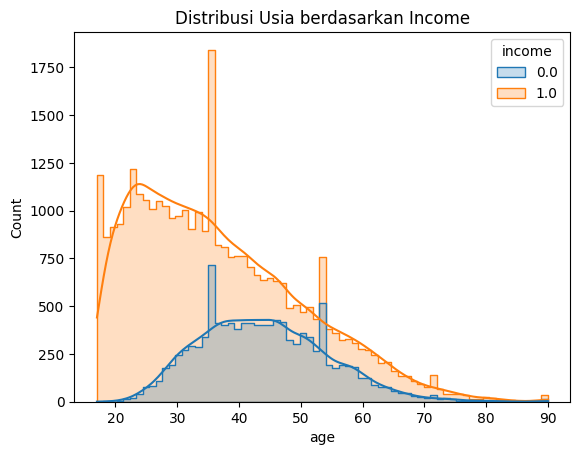

In [32]:
# lihat distribusi usia berdasarkan income
sns.histplot(data=df, x="age", hue="income", kde=True, element="step")
plt.title("Distribusi Usia berdasarkan Income")
plt.show()

## Split Dataset

In [33]:
!pip install -U scikit-learn imbalanced-learn

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [35]:
print(df['income'].isnull().sum())
df.isna().sum()
df.dropna(inplace=True)

3339


In [36]:
df.isna().sum()

,0
age,0
fnlwgt,0
educational-num,0
capital-gain,0
capital-loss,0
hours-per-week,0
workclass_Private,0
workclass_Self-Employed,0
workclass_Unemployed,0
education_Low,0


In [37]:
# Pisahkan fitur dan target

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
# Scaling data agar tidak terlalu jauh perbedaannya
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Handling output yang tidak seimbang
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [40]:
print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_train_res.value_counts())

Sebelum SMOTE: income
1.0    25223
0.0     8283
Name: count, dtype: int64
Sesudah SMOTE: income
0.0    25223
1.0    25223
Name: count, dtype: int64


## Training Model KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Evaluasi Model

              precision    recall  f1-score   support

         0.0       0.39      0.60      0.47      2071
         1.0       0.84      0.69      0.76      6306

    accuracy                           0.67      8377
   macro avg       0.62      0.65      0.62      8377
weighted avg       0.73      0.67      0.69      8377



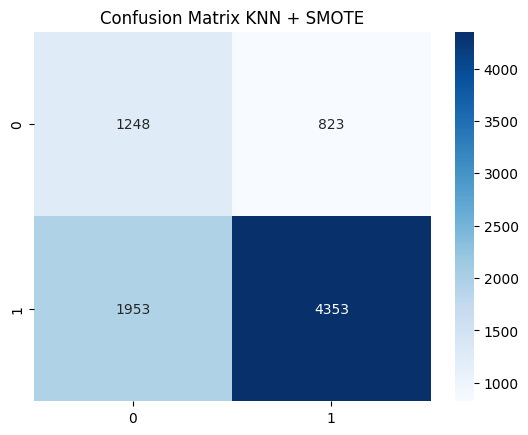

In [42]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix KNN + SMOTE")
plt.show()

Hasilnya Jelek
## Coba Tuning HyperParameter

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_dist = {
    'n_neighbors': np.arange(3, 20, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_res, y_train_res)
print(random_search.best_params_)

{'weights': 'distance', 'p': 1, 'n_neighbors': np.int64(9)}


### Evalusasi lagi

In [46]:
# Ambil model terbaik
best_model = random_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1171  900]
 [1642 4664]]
              precision    recall  f1-score   support

         0.0       0.42      0.57      0.48      2071
         1.0       0.84      0.74      0.79      6306

    accuracy                           0.70      8377
   macro avg       0.63      0.65      0.63      8377
weighted avg       0.73      0.70      0.71      8377

